In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from datetime import datetime

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

In [109]:
file_path = "/PSDDP04062020 (2) (1).xlsx"  # Replace with your file path
sheets = pd.read_excel(file_path, sheet_name=None)  # Read all sheets
df_combined = pd.concat(sheets.values(), ignore_index=True)

In [110]:
df_combined.head(15)

,Data for the day,"Payment Systems – Daily Data Publication (updated as on July 1, 2020)",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,"Payment and Settlement Systems – Daily Data Publication (updated as on September 02, 2024)","Payment and Settlement Systems – Daily Data Publication (updated as on October 01, 2024)","Payment and Settlement Systems – Daily Data Publication (updated as on November 01, 2024)","Payment and Settlement Systems – Daily Data Publication (updated as on December 02, 2024)","Payment and Settlement Systems – Daily Data Publication (updated as on January 01, 2025)","Payment and Settlement Systems – Daily Data Publication (updated as on February 01, 2025)","Payment and Settlement Systems – Daily Data Publication (updated as on March 01, 2025)","Payment and Settlement Systems – Daily Data Publication (updated as on April 01, 2025)","Payment and Settlement Systems – Daily Data Publication (updated as on May 01, 2025)","Payment and Settlement Systems – Daily Data Publication (updated as on May 31, 2025)"
0,NaN,(Volume in lakhs; Value in INR Crores),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,PAYMENT TRANSACTIONS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,RBI Operated,NaN,NaN,NaN,NPCI Operated,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,RTGS,NaN,NEFT,NaN,AePS,NaN,UPI,NaN,IMPS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Vol,Val,Vol,Val,Vol,Val,Vol,Val,Vol,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"June 1, 2020",4.85,436996.69,172.11,104275.13,0.43618,7.682205,476.9671,10413.108975,76.80648,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"June 2, 2020",4.5434,361878.871532,100.06772,65259.016108,0.44138,7.665516,476.78182,9951.298586,72.24891,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"June 3, 2020",4.30157,330632.892258,100.36426,62985.750191,0.43952,7.476038,456.2593,9622.375213,68.14805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"June 4, 2020",4.35152,329072.44741,94.65655,63148.288625,0.44828,7.323838,463.04959,9639.502869,70.68543,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"June 5, 2020",4.56267,365468.951984,111.26259,68932.7186,0.47535,7.324794,464.79398,9539.524729,72.99507,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:

df = df_combined.iloc[5:].reset_index(drop=True)
df = df.iloc[:, [0, 7, 8]]
df.head(10)

,Data for the day,Unnamed: 7,Unnamed: 8
0,"June 1, 2020",476.9671,10413.108975
1,"June 2, 2020",476.78182,9951.298586
2,"June 3, 2020",456.2593,9622.375213
3,"June 4, 2020",463.04959,9639.502869
4,"June 5, 2020",464.79398,9539.524729
5,"June 6, 2020",458.64927,9119.199542
6,"June 7, 2020",427.25912,6874.9973
7,"June 8, 2020",469.99287,10062.170486
8,"June 9, 2020",466.98338,9786.857657
9,"June 10, 2020",461.58058,9839.410284


In [112]:
#df.columns["date","vol","val"]
df = df.set_axis(["Date","Vol", "Val"], axis=1)#renaming the column
df.head(10)

,Date,Vol,Val
0,"June 1, 2020",476.9671,10413.108975
1,"June 2, 2020",476.78182,9951.298586
2,"June 3, 2020",456.2593,9622.375213
3,"June 4, 2020",463.04959,9639.502869
4,"June 5, 2020",464.79398,9539.524729
5,"June 6, 2020",458.64927,9119.199542
6,"June 7, 2020",427.25912,6874.9973
7,"June 8, 2020",469.99287,10062.170486
8,"June 9, 2020",466.98338,9786.857657
9,"June 10, 2020",461.58058,9839.410284


In [113]:
df.head()

,Date,Vol,Val
0,"June 1, 2020",476.9671,10413.108975
1,"June 2, 2020",476.78182,9951.298586
2,"June 3, 2020",456.2593,9622.375213
3,"June 4, 2020",463.04959,9639.502869
4,"June 5, 2020",464.79398,9539.524729


In [114]:
df.shape

(2937, 3)

In [115]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)

In [116]:
df.index.isna().sum()

np.int64(1112)

In [117]:
df = df[~df.index.isna()]

In [118]:
df.shape

(1825, 2)

In [119]:
df['Vol'] = pd.to_numeric(df['Vol'], errors='coerce')
df['Val'] = pd.to_numeric(df['Val'], errors='coerce')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2020-06-01 to 2025-05-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Vol     1825 non-null   float64
 1   Val     1825 non-null   float64
dtypes: float64(2)
memory usage: 42.8 KB


In [121]:
df.dropna(subset=['Vol', 'Val'], inplace=True)

In [122]:
df.shape

(1825, 2)

In [123]:
df.describe()

,Vol,Val
count,1825.000000,1825.000000
mean,2754.607354,42155.175855
std,1711.908817,23266.617456
min,289.002530,4333.739249
25%,1199.040000,21095.720000
50%,2473.990000,39710.680000
75%,4262.700000,60705.640000
max,6441.180000,102791.420000


In [124]:
# Plot of volume vs date
fig = px.line(df, x=df.index, y="Vol")
fig.show()

In [125]:
# Plot of value vs date
fig = px.line(df, x=df.index, y="Val")
fig.show()

In [126]:
# Barplot of volume vs year
df_year = df.groupby(df.index.year)['Vol'].sum()
fig = px.bar(df_year, x=df_year.index, y='Vol', title='Volume per Year')
fig.show()

In [200]:
# Barplot of value vs year
df_year = df.groupby(df.index.year)['Val'].sum()
fig = px.bar(df_year, x=df_year.index, y='Val', title='Value per Year')
fig.show()

In [128]:
## monthly data
# Grouping by month and summing the 'Vol' column
df_monthly = df.resample('M').sum()
df_monthly.index = df_monthly.index.strftime('%B %Y')

# Plotting with Plotly Express
fig = px.line(df_monthly, x=df_monthly.index, y='Vol', title='Monthly Transaction Volume')
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Transaction Volume'
)
fig.show()

In [129]:
# Plotting with Plotly Express
fig = px.line(df_monthly, x=df_monthly.index, y='Val', title='Monthly Transaction Value')
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Transaction Value'
)
fig.show()

In [130]:
# Grouping by week and summing the 'Vol' column
df_weekly = df.resample('W').sum()
# Plotting with Plotly Express
fig = px.line(df_weekly, x=df_weekly.index, y='Vol', title='Weekly Transaction Volume')
fig.update_layout(
    xaxis_title='Week',
    yaxis_title='Transaction Volume'
)
fig.show()

In [131]:
# Plotting with Plotly Express
fig = px.line(df_weekly, x=df_weekly.index, y='Val', title='Weekly Transaction Value')
fig.update_layout(
    xaxis_title='Week',
    yaxis_title='Transaction Value'
)
fig.show()


In [132]:

import numpy as np
import pandas as pd
import plotly.express as px
from scipy.signal import detrend

# Step 1: Detrend the data (remove long-term upward trend)
vol_detrended = detrend(df['Vol'].values)  # Returns a NumPy array

# Step 2: Apply FFT
fft_vals = np.fft.fft(vol_detrended)
fft_freqs = np.fft.fftfreq(len(vol_detrended))

# Step 3: Keep only positive frequencies
positive_freqs = fft_freqs[fft_freqs > 0]
positive_vals = np.abs(fft_vals[fft_freqs > 0])

# Step 4: Focus on low-frequency range where seasonality usually occurs
mask = positive_freqs < 0.2
freqs_zoomed = positive_freqs[mask]
amplitudes_zoomed = positive_vals[mask]

# Step 5: Plot the periodogram
fig = px.line(x=freqs_zoomed, y=amplitudes_zoomed, title="📊 Zoomed Periodogram (Detrended UPI Volume)")
fig.update_layout(
    xaxis_title="Frequency (1/days)",
    yaxis_title="Amplitude",
    showlegend=False
)
fig.show()

# Step 6: Find dominant frequency and convert to period
dominant_idx = np.argmax(amplitudes_zoomed)
dominant_freq = freqs_zoomed[dominant_idx]
dominant_period = 1 / dominant_freq

print(f"🎯 Dominant periodicity (after detrending): ~{dominant_period:.2f} days")



🎯 Dominant periodicity (after detrending): ~1825.00 days


In [133]:

import numpy as np
import pandas as pd
import plotly.express as px
from scipy.signal import detrend

# Step 1: Detrend the data (remove long-term upward trend)
val_detrended = detrend(df['Val'].values)  # Returns a NumPy array

# Step 2: Apply FFT
fft_vals = np.fft.fft(val_detrended)
fft_freqs = np.fft.fftfreq(len(val_detrended))

# Step 3: Keep only positive frequencies
positive_freqs = fft_freqs[fft_freqs > 0]
positive_vals = np.abs(fft_vals[fft_freqs > 0])

# Step 4: Focus on low-frequency range where seasonality usually occurs
mask = positive_freqs < 0.2
freqs_zoomed = positive_freqs[mask]
amplitudes_zoomed = positive_vals[mask]

# Step 5: Plot the periodogram
fig = px.line(x=freqs_zoomed, y=amplitudes_zoomed, title="📊 Zoomed Periodogram (Detrended UPI Value)")
fig.update_layout(
    xaxis_title="Frequency (1/days)",
    yaxis_title="Amplitude",
    showlegend=False
)
fig.show()

# Step 6: Find dominant frequency and convert to period
dominant_idx = np.argmax(amplitudes_zoomed)
dominant_freq = freqs_zoomed[dominant_idx]
dominant_period = 1 / dominant_freq

print(f"🎯 Dominant periodicity (after detrending): ~{dominant_period:.2f} days")



🎯 Dominant periodicity (after detrending): ~30.42 days


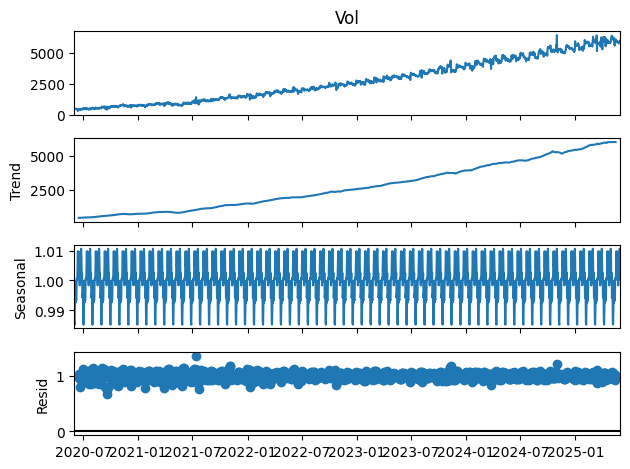

In [134]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
dec = sm.tsa.seasonal_decompose(df['Vol'],period = 30, model = 'multiplicative').plot()
plt.show()

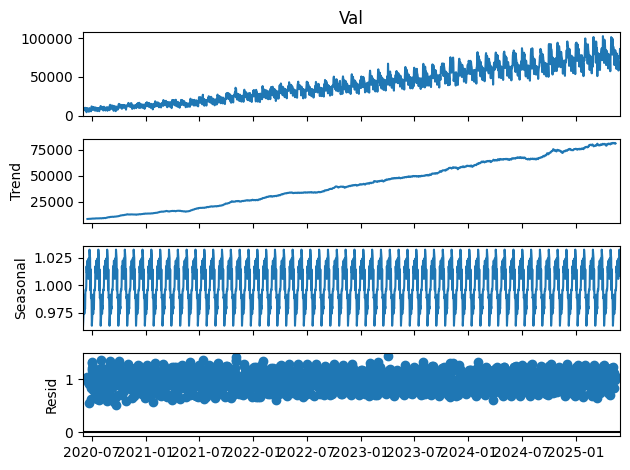

In [135]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
dec = sm.tsa.seasonal_decompose(df['Val'],period = 30, model = 'multiplicative').plot()
plt.show()

In [136]:
#Ho: It is non stationary
#H1: It is stationary
from statsmodels.tsa.stattools import adfuller

def adfuller_test(col):
    result=adfuller(col)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [137]:
adfuller_test(df['Vol'])

ADF Test Statistic : 1.8876231837153217
p-value : 0.998507844450369
#Lags Used : 25
Number of Observations Used : 1799
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [138]:
adfuller_test(df['Val'])

ADF Test Statistic : -0.3786121210631364
p-value : 0.9136090080755469
#Lags Used : 25
Number of Observations Used : 1799
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


since it is non stationarity we need to apply the differencing
''''''Why Do We Perform Seasonal Differencing (df.diff(periods=30))?
Seasonal differencing helps remove repeating patterns by subtracting values from the same point in the previous cycle:
If data follows a 30-day seasonal pattern, differencing with periods=30 removes the seasonal trend and highlights real changes.
It helps stabilize the mean and makes the series stationary, which is crucial for forecasting models like ARIMA.


In [139]:
df['Vol_1st_diff'] = df['Vol'].diff(periods = 30)

adfuller_test(df['Vol_1st_diff'][30:])

ADF Test Statistic : -6.559120956844118
p-value : 8.468325127515317e-09
#Lags Used : 24
Number of Observations Used : 1770
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [140]:
df['Val_1st_diff'] = df['Val'].diff(periods = 30)

adfuller_test(df['Val_1st_diff'][30:])

ADF Test Statistic : -7.413875708559592
p-value : 7.018028239412816e-11
#Lags Used : 21
Number of Observations Used : 1773
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [141]:
#first 30 entries will have NaN values
df.sample(4)

,Vol,Val,Vol_1st_diff,Val_1st_diff
Date,,,,
2023-10-09,3823.20000,67283.1800,258.13,14840.69
2022-08-20,2103.98000,33072.2700,108.39,988.97
2022-10-06,2331.47000,41501.4600,43.05,217.45
2020-06-07,427.25912,6874.9973,NaN,NaN


In [142]:
fig = px.line(df, x=df.index, y="Vol_1st_diff")
fig.show()

In [143]:
fig = px.line(df, x=df.index, y="Val_1st_diff")
fig.show()

In [144]:
# 1. Apply log transform
df['Log_Val'] = np.log(df['Val'])

# 2. First-order difference the log
df['Log_Val_diff'] = df['Log_Val'].diff()

# 3. Plot it
import plotly.express as px
fig = px.line(df, y='Log_Val_diff', title='Log Differenced UPI Value')
fig.show()

In [145]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['Log_Val_diff'].dropna())
print(f"ADF p-value: {adf_result[1]}")

ADF p-value: 0.0


In [146]:
df.sample(10)# as there is heteroskedasticity in the upi value we have use log transformation and the plot looks quit free from the same

,Vol,Val,Vol_1st_diff,Val_1st_diff,Log_Val,Log_Val_diff
Date,,,,,,
2025-02-01,6047.54,99835.69,395.31000,5406.370000,11.511281,0.087517
2022-07-26,1951.14,31535.55,86.06000,8520.870000,10.358871,-0.056313
2024-09-24,4824.49,63656.76,213.77000,16188.490000,11.061261,-0.045055
2025-04-06,5882.73,68150.47,-97.23000,-19067.750000,11.129473,-0.281412
2023-09-01,3655.33,66251.46,198.45159,3944.354077,11.101213,0.131634
2024-11-01,5175.79,74047.52,-271.63000,-3657.480000,11.212462,-0.141737
2022-04-26,1820.41,32293.94,111.44000,10356.820000,10.382635,-0.040574
2022-02-09,1718.83,32468.47,68.30000,-805.200000,10.388025,-0.006561
2025-03-19,5761.34,76504.71,137.04000,-1232.680000,11.245108,-0.006301


Model fitting
ACF & PACF Plots for "Vol" and "Val" data
on vol

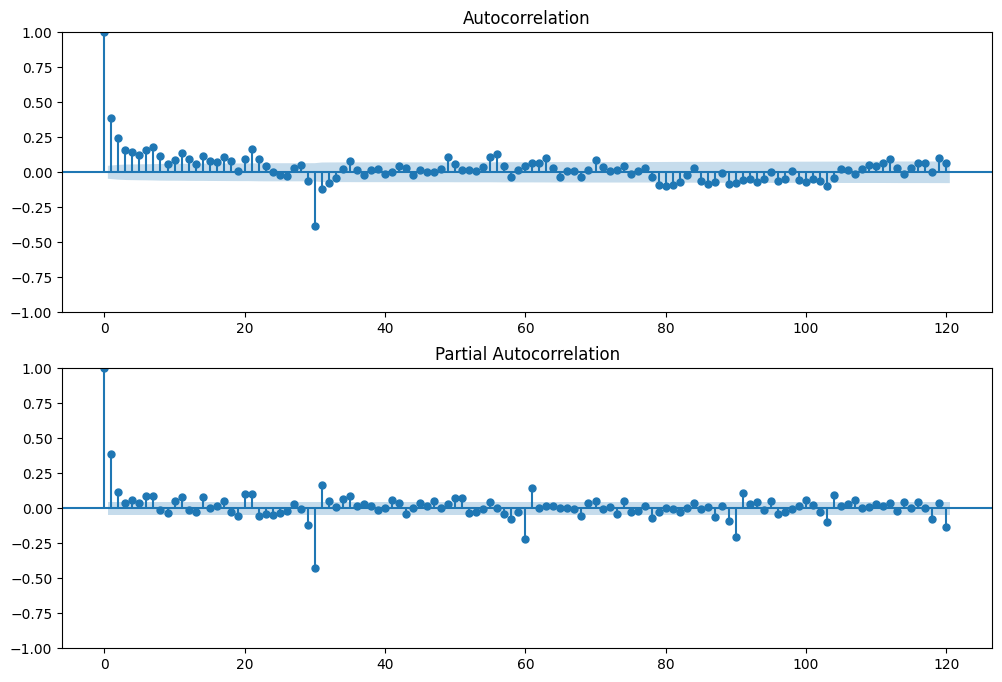

In [147]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Vol_1st_diff'].iloc[30:],lags=120,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Vol_1st_diff'].iloc[30:],lags=120,ax=ax2)

In [148]:
from itertools import product
from statsmodels.tsa.arima.model import ARIMA

# Ensure ts is not empty
ts = df['Vol_1st_diff'].iloc[31:].dropna()  # Drop NaNs if any

# Define parameter ranges
p_range = range(0, 5)  # p from 0 to 4
q_range = range(0, 5)  # q from 0 to 4
d = 1  # Differencing order

# Store results
results = []

# Iterate over all combinations of p and q
for p, q in product(p_range, q_range):
    try:
        model = ARIMA(ts, order=(p, d, q))
        result = model.fit()

        aic = result.aic
        bic = result.bic

        results.append((p, d, q, aic, bic))

        print(f"ARIMA({p},{d},{q}) - AIC: {aic}, BIC: {bic}")

    except Exception as e:
        print(f"Failed for ARIMA({p},{d},{q}): {e}")

# Convert to DataFrame and display results
if results:
    results_df = pd.DataFrame(results, columns=['p', 'd', 'q', 'AIC', 'BIC'])
    print("Best models based on AIC:")
    print(results_df.sort_values(by='AIC'))
else:
    print("No valid ARIMA models found.")

ARIMA(0,1,0) - AIC: 23604.20975757868, BIC: 23609.701403052284
ARIMA(0,1,1) - AIC: 23031.414077489906, BIC: 23042.397368437116
ARIMA(0,1,2) - AIC: 22955.120032781575, BIC: 22971.59496920239
ARIMA(0,1,3) - AIC: 22936.231162246608, BIC: 22958.197744141027
ARIMA(0,1,4) - AIC: 22936.0784275665, BIC: 22963.536654934524
ARIMA(1,1,0) - AIC: 23319.982686072548, BIC: 23330.965977019758
ARIMA(1,1,1) - AIC: 22941.596059111434, BIC: 22958.07099553225
ARIMA(1,1,2) - AIC: 22922.351508927335, BIC: 22944.318090821755
ARIMA(1,1,3) - AIC: 22915.945784571508, BIC: 22943.404011939532
ARIMA(1,1,4) - AIC: 22908.59983218102, BIC: 22941.549705022648
ARIMA(2,1,0) - AIC: 23227.510406734178, BIC: 23243.985343154993
ARIMA(2,1,1) - AIC: 22925.726927176453, BIC: 22947.693509070872
ARIMA(2,1,2) - AIC: 22909.527994530043, BIC: 22936.986221898067
ARIMA(2,1,3) - AIC: 22898.87924851659, BIC: 22931.82912135822
ARIMA(2,1,4) - AIC: 22889.623619168895, BIC: 22928.06513748413
ARIMA(3,1,0) - AIC: 23153.932708908724, BIC: 2317

In [149]:
# p=4,d=1,q=3

For value

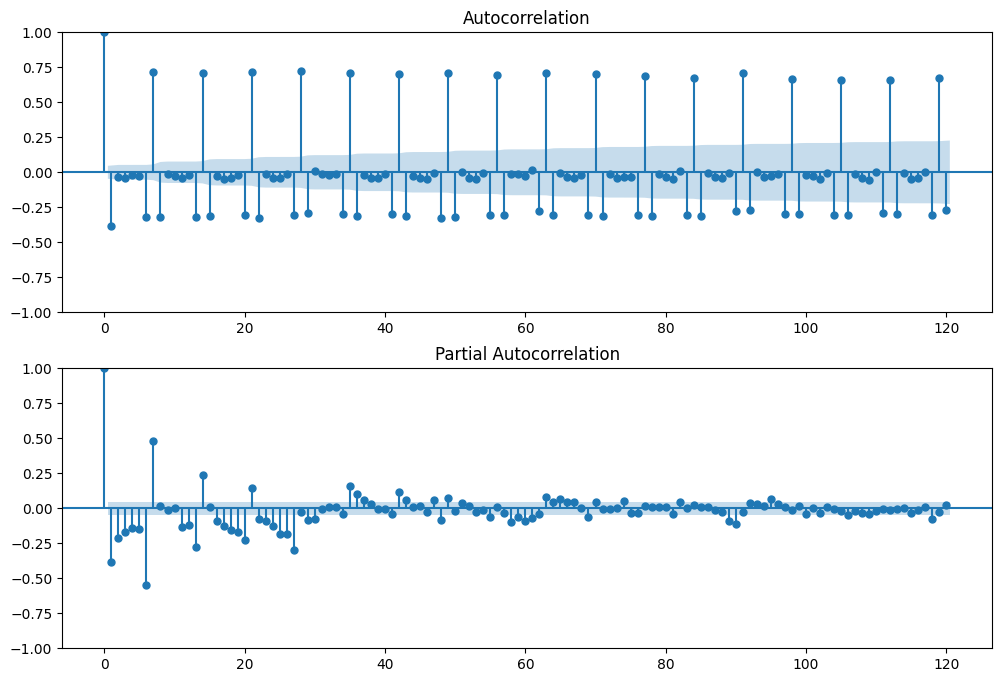

In [150]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df["Log_Val_diff"].iloc[30:],lags=120,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Log_Val_diff'].iloc[30:],lags=120,ax=ax2)

In [151]:
from itertools import product
from statsmodels.tsa.arima.model import ARIMA

# Ensure ts is not empty
ts = df['Log_Val_diff'].iloc[31:].dropna()  # Drop NaNs if any

# Define parameter ranges
p_range = range(0, 5)  # p from 0 to 4
q_range = range(0, 5)  # q from 0 to 4
d = 1  # Differencing order

# Store results
results = []

# Iterate over all combinations of p and q
for p, q in product(p_range, q_range):
    try:
        model = ARIMA(ts, order=(p, d, q))
        result = model.fit()

        aic = result.aic
        bic = result.bic

        results.append((p, d, q, aic, bic))

        print(f"ARIMA({p},{d},{q}) - AIC: {aic}, BIC: {bic}")

    except Exception as e:
        print(f"Failed for ARIMA({p},{d},{q}): {e}")

# Convert to DataFrame and display results
if results:
    results_df = pd.DataFrame(results, columns=['p', 'd', 'q', 'AIC', 'BIC'])
    print("Best models based on AIC:")
    print(results_df.sort_values(by='AIC'))
else:
    print("No valid ARIMA models found.")

ARIMA(0,1,0) - AIC: 768.5232290721495, BIC: 774.0148745457547
ARIMA(0,1,1) - AIC: -1044.2993705451008, BIC: -1033.3160795978906
ARIMA(0,1,2) - AIC: -1540.2929476150678, BIC: -1523.8180111942524
ARIMA(0,1,3) - AIC: -1616.285915630256, BIC: -1594.3193337358355
ARIMA(0,1,4) - AIC: -1672.6055164231393, BIC: -1645.1472890551136
ARIMA(1,1,0) - AIC: -117.64306310741233, BIC: -106.65977216020207
ARIMA(1,1,1) - AIC: -1324.1156697167155, BIC: -1307.6407332959002
ARIMA(1,1,2) - AIC: -1678.303289127446, BIC: -1656.3367072330254
ARIMA(1,1,3) - AIC: -1626.4478049941647, BIC: -1598.989577626139
ARIMA(1,1,4) - AIC: -1633.227568266505, BIC: -1600.277695424874
ARIMA(2,1,0) - AIC: -487.66482145116316, BIC: -471.18988503034774
ARIMA(2,1,1) - AIC: -1404.6988109174913, BIC: -1382.7322290230707
ARIMA(2,1,2) - AIC: -1449.4577126131667, BIC: -1421.999485245141
ARIMA(2,1,3) - AIC: -1846.7539586003452, BIC: -1813.8040857587143
ARIMA(2,1,4) - AIC: -1765.2164209315738, BIC: -1726.7749026163378
ARIMA(3,1,0) - AIC: 

model parameters are specified p=4 d=1 q=4 for value column
model fitting





In [152]:
# Split the data into train and test sets
train_size = int(len(df) * 0.8)
train_Vol, test_Vol = df['Vol'].iloc[:train_size], df['Vol'].iloc[train_size:]
train_Val, test_Val = df['Val'].iloc[:train_size], df['Val'].iloc[train_size:]

In [153]:
# Fit ARIMA model
# (p, d, q) are the parameters of the ARIMA model. You can adjust these parameters or use auto_arima to determine the best parameters.
model = ARIMA(train_Vol, order=(4, 1, 3))
model_fit = model.fit()

In [154]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    Vol   No. Observations:                 1460
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -8610.451
Date:                Sun, 13 Jul 2025   AIC                          17236.902
Time:                        03:39:03   BIC                          17279.186
Sample:                    06-01-2020   HQIC                         17252.676
                         - 05-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0962      0.028      3.451      0.001       0.042       0.151
ar.L2         -0.5400      0.032    -16.963      0.000      -0.602      -0.478
ar.L3          0.6242      0.032     19.294      0.0

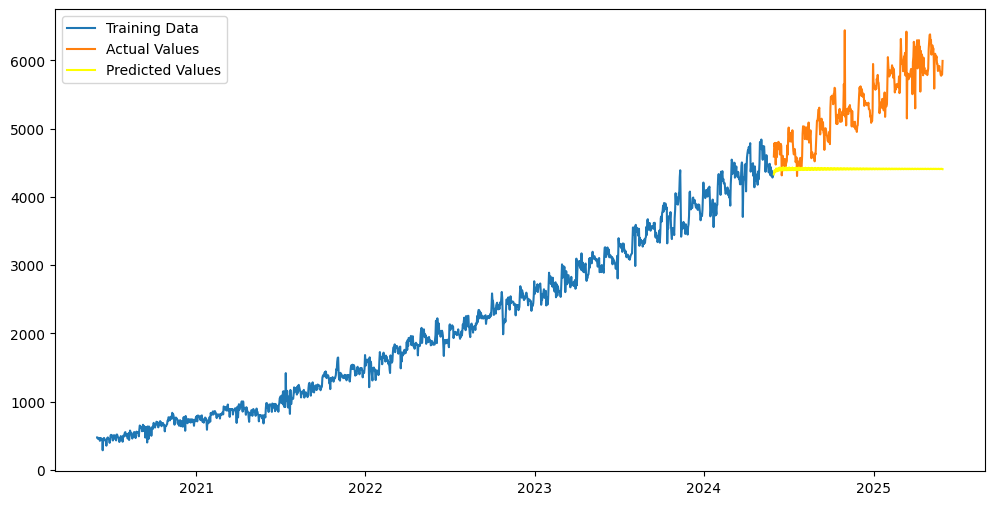

In [155]:
# Make predictions
predictions = model_fit.forecast(steps=len(test_Vol))
predictions = pd.Series(predictions, index=test_Vol.index)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_Vol, label='Training Data')
plt.plot(test_Vol, label='Actual Values')
plt.plot(predictions, label='Predicted Values', color='yellow')
plt.legend()
plt.show()

In [167]:
# Fit ARIMA model
# (p, d, q) are the parameters of the ARIMA model. You can adjust these parameters or use auto_arima to determine the best parameters.
model = ARIMA(train_Val, order=(4, 1, 4))
model_fit = model.fit()

In [168]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    Val   No. Observations:                 1460
Model:                 ARIMA(4, 1, 4)   Log Likelihood              -14351.426
Date:                Sun, 13 Jul 2025   AIC                          28720.851
Time:                        04:12:53   BIC                          28768.421
Sample:                    06-01-2020   HQIC                         28738.597
                         - 05-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5096      0.643     -0.792      0.428      -1.771       0.751
ar.L2          0.8917      0.750      1.188      0.235      -0.579       2.362
ar.L3          0.5109      0.096      5.326      0.0

In [169]:
# Make predictions
predictions = model_fit.forecast(steps=len(test_Val))
predictions = pd.Series(predictions, index=test_Val.index)

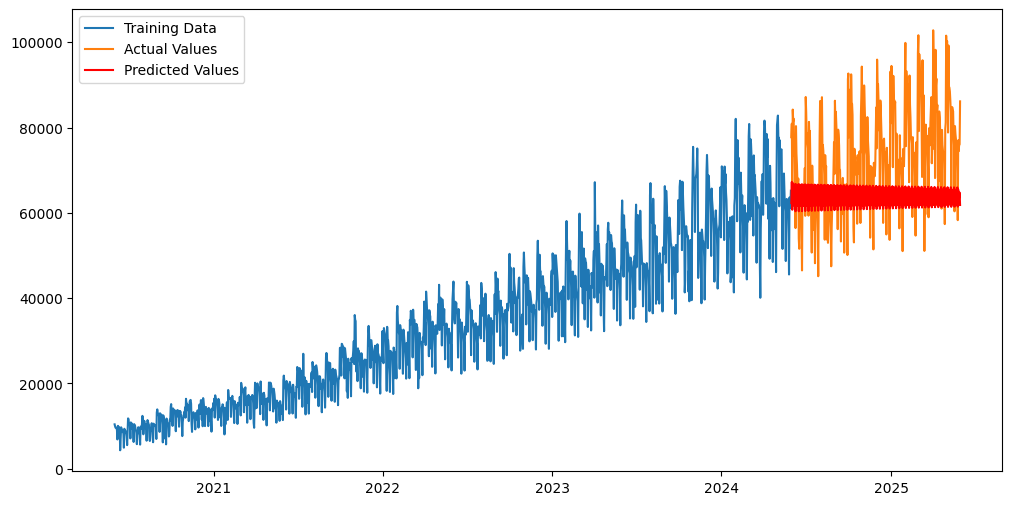

In [170]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_Val, label='Training Data')
plt.plot(test_Val, label='Actual Values')
plt.plot(predictions, label='Predicted Values', color='red')
plt.legend()
plt.show()

In [172]:
pip install pmdarima

In [194]:
# Fit SARIMA model
# (p, d, q) are the parameters for the non-seasonal part of the model.
# (P, D, Q, s) are the parameters for the seasonal part of the model.
# 's' is the periodicity of the seasonality (e.g., 7 for weekly, 12 for monthly).
# You can adjust these parameters or use auto_arima to determine the best parameters.
from statsmodels.tsa.statespace.sarimax import SARIMAX


model = SARIMAX(train_Vol, order=(4, 1, 3), seasonal_order=(3, 1, 1, 30))
model_fit = model.fit(disp=False)

# Forecast and get predictions for the training data to get residuals
train_predictions = model_fit.fittedvalues
residuals = train_Vol - train_predictions

# Print summary of the model
print(model_fit.summary())


                                      SARIMAX Results                                       
Dep. Variable:                                  Vol   No. Observations:                 1460
Model:             SARIMAX(4, 1, 3)x(3, 1, [1], 30)   Log Likelihood               -8486.710
Date:                              Sun, 13 Jul 2025   AIC                          16997.420
Time:                                      05:32:39   BIC                          17060.597
Sample:                                  06-01-2020   HQIC                         17021.013
                                       - 05-30-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0488      0.047     -1.042      0.297      -0.141       0.043
ar.L2         -0.67

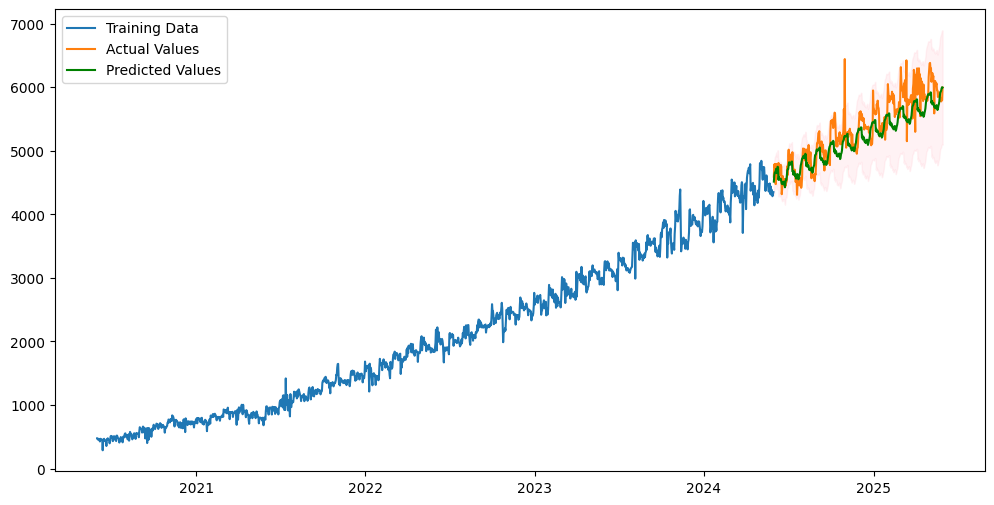

In [195]:
# Make predictions
predictions = model_fit.get_forecast(steps=len(test_Vol))
predicted_mean = predictions.predicted_mean
conf_int = predictions.conf_int()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_Vol, label='Training Data')
plt.plot(test_Vol, label='Actual Values')
plt.plot(predicted_mean, label='Predicted Values', color='green')
plt.fill_between(predicted_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend()
plt.show()

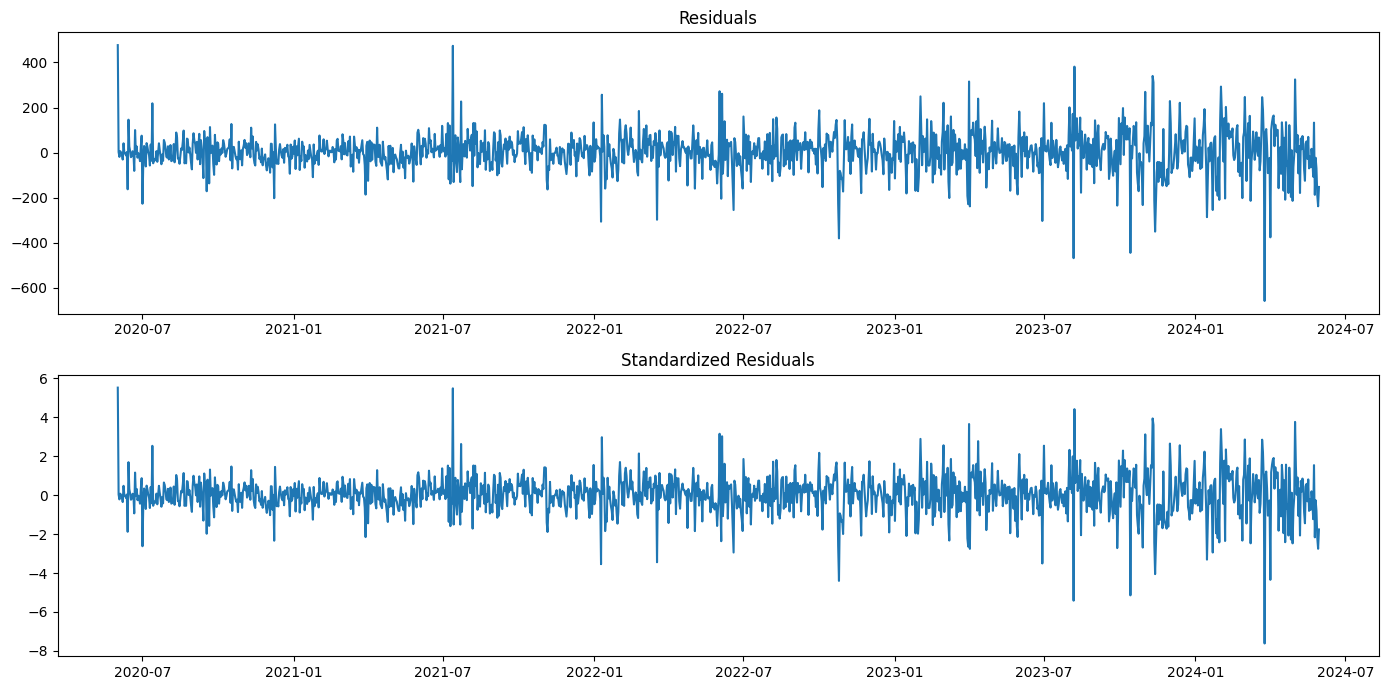

In [196]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats

# Residuals
residuals = model_fit.resid
standardized_residuals = residuals / np.std(residuals)

# Plot the residuals and standardized residuals
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(residuals)
plt.title('Residuals')

plt.subplot(2, 1, 2)
plt.plot(standardized_residuals)
plt.title('Standardized Residuals')

plt.tight_layout()
plt.show()

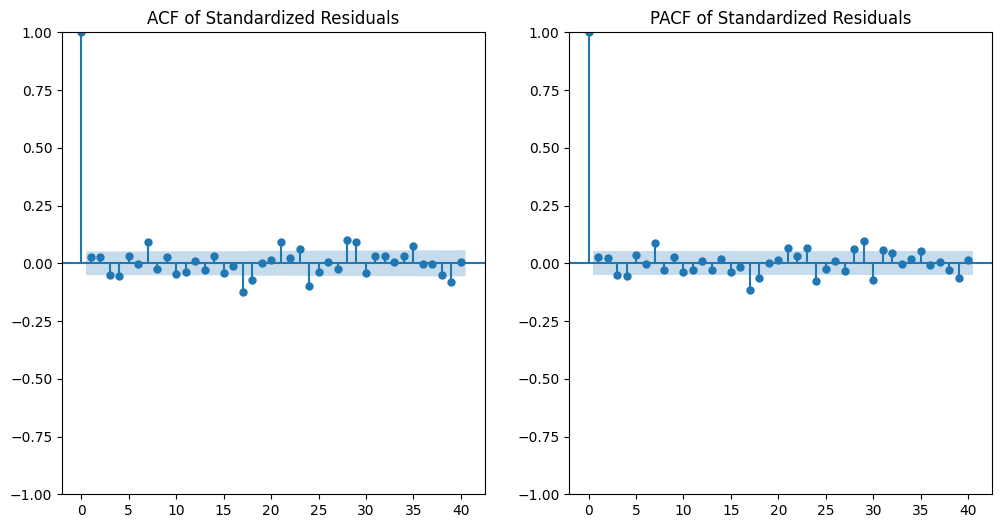

In [197]:
# Plot ACF and PACF of standardized residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(standardized_residuals, ax=plt.gca(), lags=40)
plt.title('ACF of Standardized Residuals')
plt.subplot(122)
plot_pacf(standardized_residuals, ax=plt.gca(), lags=40)
plt.title('PACF of Standardized Residuals')
plt.show()

Ljung-Box test result:
     lb_stat  lb_pvalue
5  11.894503   0.036262
Reject the null hypothesis: Residuals are not independently distributed.


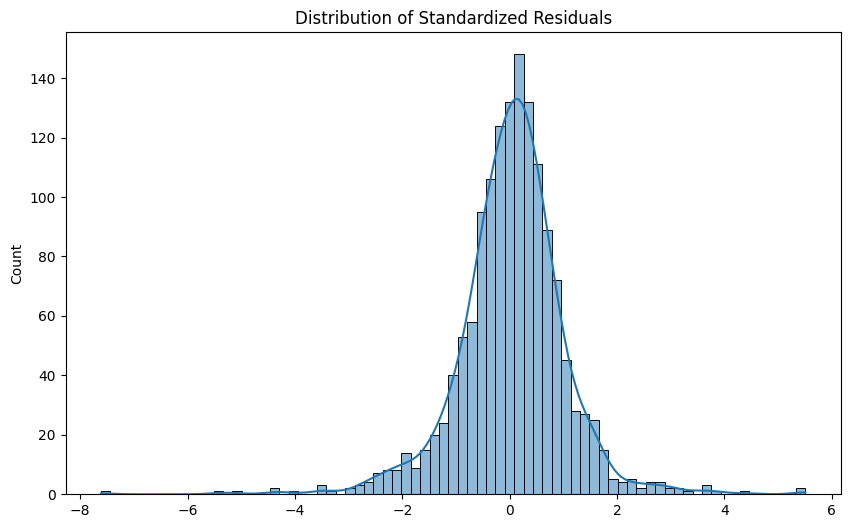

In [198]:
# Perform Ljung-Box test
ljung_box_result = acorr_ljungbox(standardized_residuals, lags=[5], return_df=True)
print("Ljung-Box test result:")
print(ljung_box_result)

# Interpretation
if ljung_box_result['lb_pvalue'].values[0] > 0.05:
    print("Fail to reject the null hypothesis: Residuals are independently distributed.")
else:
    print("Reject the null hypothesis: Residuals are not independently distributed.")

# Plot the distribution of the standardized residuals
plt.figure(figsize=(10, 6))
sns.histplot(standardized_residuals, kde=True)
plt.title('Distribution of Standardized Residuals')
plt.show()

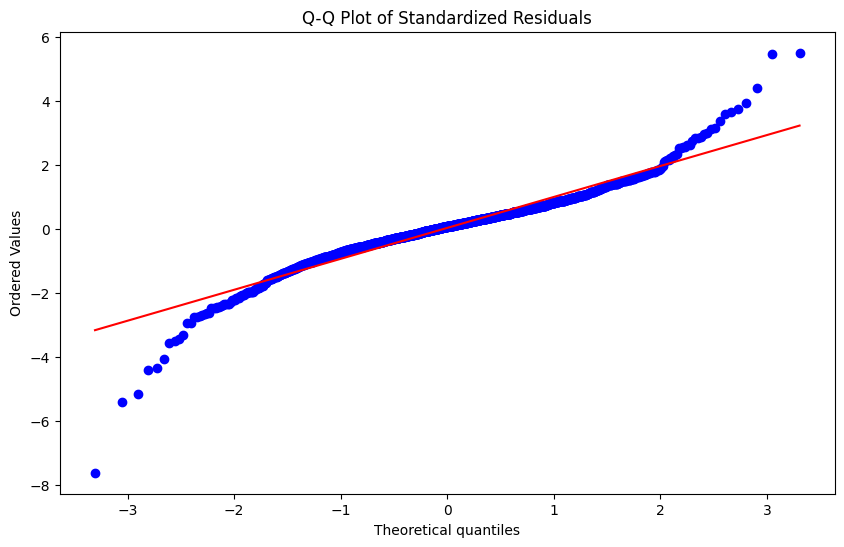

In [206]:
# Plot Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(standardized_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Standardized Residuals')
plt.show()

In [185]:
model = SARIMAX(train_Val, order=(4, 1, 4), seasonal_order=(1, 1, 1, 30))
model_fit = model.fit(disp=False)

# Forecast and get predictions for the training data to get residuals
train_predictions = model_fit.fittedvalues
residuals = train_Val - train_predictions

# Print summary of the model
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                  Val   No. Observations:                 1460
Model:             SARIMAX(4, 1, 4)x(1, 1, [1], 30)   Log Likelihood              -14158.720
Date:                              Sun, 13 Jul 2025   AIC                          28339.440
Time:                                      05:15:05   BIC                          28397.352
Sample:                                  06-01-2020   HQIC                         28361.067
                                       - 05-30-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8642      0.146     -5.928      0.000      -1.150      -0.578
ar.L2          0.19

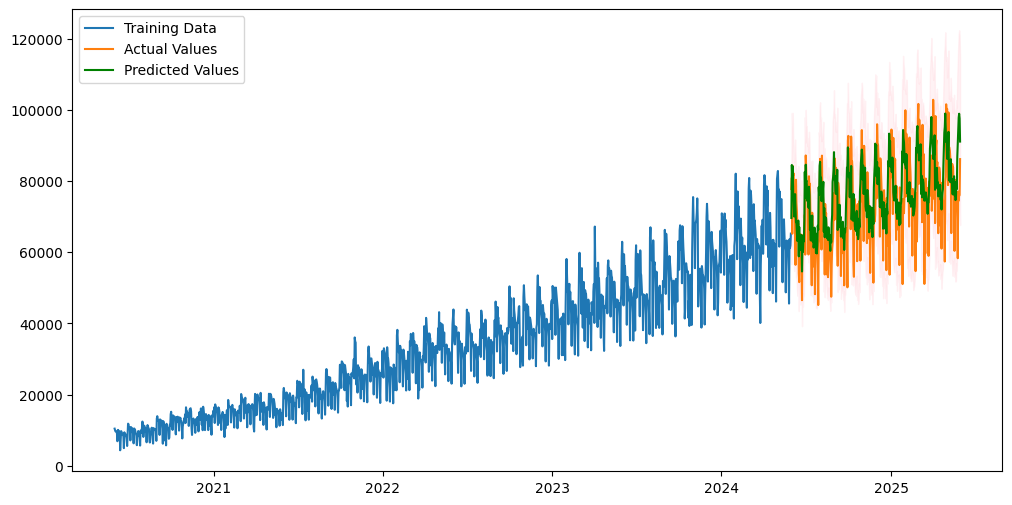

In [186]:
# Make predictions
predictions = model_fit.get_forecast(steps=len(test_Val))
predicted_mean = predictions.predicted_mean
conf_int = predictions.conf_int()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_Val, label='Training Data')
plt.plot(test_Val, label='Actual Values')
plt.plot(predicted_mean, label='Predicted Values', color='green')
plt.fill_between(predicted_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.2)
plt.legend()
plt.show()

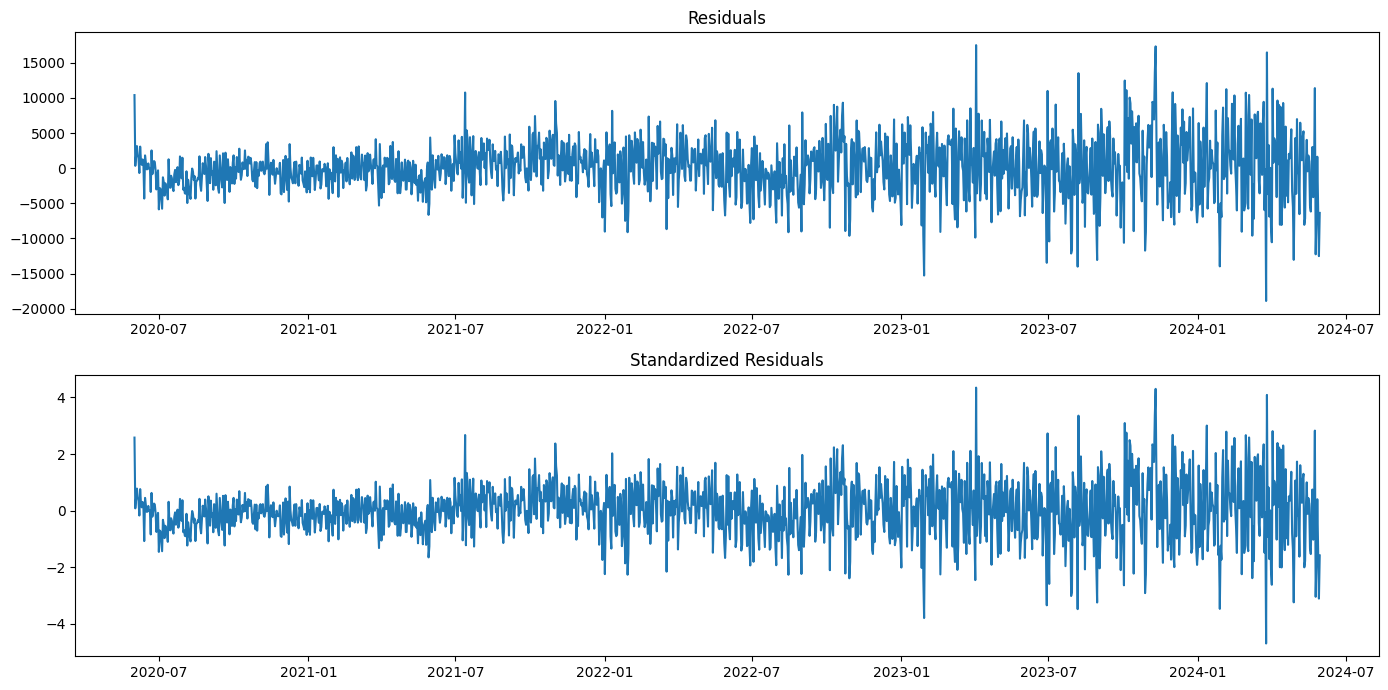

In [187]:
# Residuals
residuals = model_fit.resid
standardized_residuals = residuals / np.std(residuals)

# Plot the residuals and standardized residuals
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(residuals)
plt.title('Residuals')

plt.subplot(2, 1, 2)
plt.plot(standardized_residuals)
plt.title('Standardized Residuals')

plt.tight_layout()
plt.show()

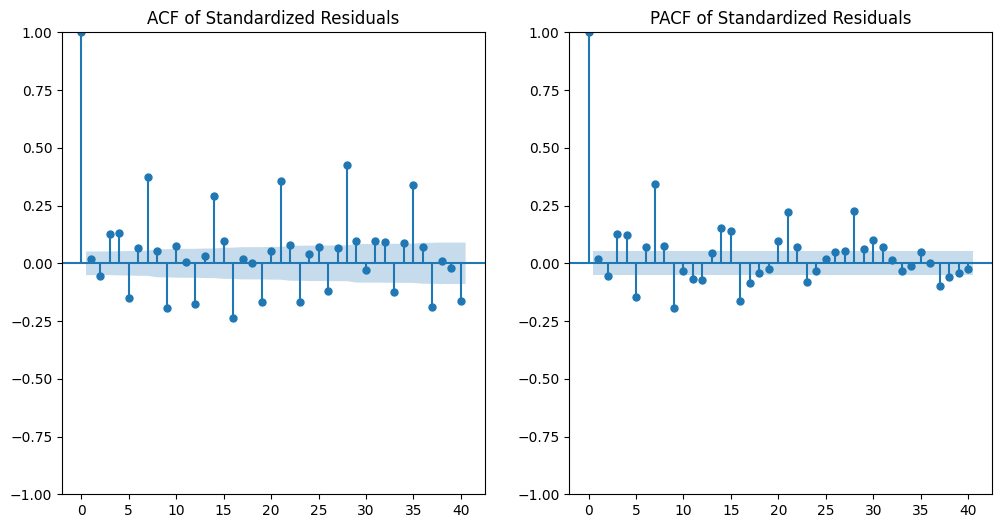

In [188]:
# Plot ACF and PACF of standardized residuals
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(standardized_residuals, ax=plt.gca(), lags=40)
plt.title('ACF of Standardized Residuals')
plt.subplot(122)
plot_pacf(standardized_residuals, ax=plt.gca(), lags=40)
plt.title('PACF of Standardized Residuals')
plt.show()

Ljung-Box test result:
     lb_stat  lb_pvalue
9  26.592733   0.001633
Reject the null hypothesis: Residuals are not independently distributed.


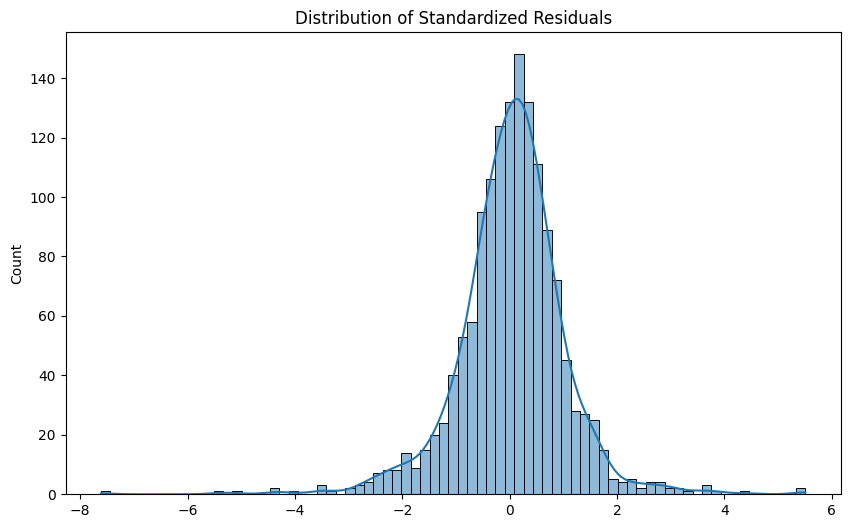

In [207]:
# Perform Ljung-Box test
ljung_box_result = acorr_ljungbox(standardized_residuals, lags=[9], return_df=True)
print("Ljung-Box test result:")
print(ljung_box_result)

# Interpretation
if ljung_box_result['lb_pvalue'].values[0] > 0.05:
    print("Fail to reject the null hypothesis: Residuals are independently distributed.")
else:
    print("Reject the null hypothesis: Residuals are not independently distributed.")

# Plot the distribution of the standardized residuals
plt.figure(figsize=(10, 6))
sns.histplot(standardized_residuals, kde=True)
plt.title('Distribution of Standardized Residuals')
plt.show()

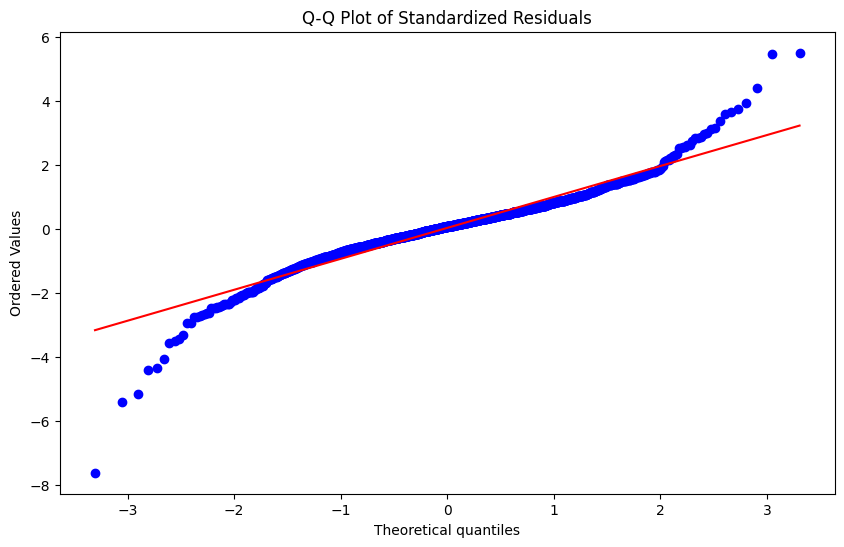

In [208]:
# Plot Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(standardized_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Standardized Residuals')
plt.show()